In [5]:
from larch.io.xrf_netcdf import read_xrf_netcdf
import os
import numpy as np
import matplotlib.pyplot as plt

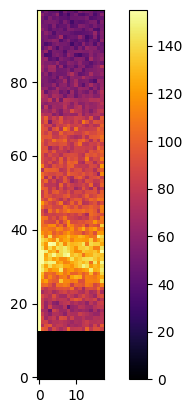

In [6]:
scan_no = 148
scan_name = f"2idd_{scan_no:04d}"
# xrf_dir = '/net/micdata/data1/2idd/2025-3/flyscan/FLYXRF'
xrf_dir = '/net/micdata/data1/2idd/2025-3/Luo/flyXRF'
files = [fn for fn in os.listdir(xrf_dir) if scan_name in fn]
files = sorted(files, key=lambda x: int(x.replace(scan_name+"_", "").replace(".nc", "")))

mca_arr = None
mca_arr_all = None
# cr_range = [360, 376]
# cr_range = [953, 969]
# cr_range = [650, 670]
cr_range = [993, 1014]
cr_map = None
for fn in files:
    try:
        a = read_xrf_netcdf(os.path.join(xrf_dir, fn))
        a_data = np.expand_dims(a.counts, axis=0)
        cr_data = np.sum(a_data[:,:,0,cr_range[0]:cr_range[1]], axis=2)
    except Exception as e:
        a_data = None
        print(f"Error reading {fn}: {e}")
        continue

    if a_data is not None:
        if mca_arr is None:
            mca_arr = a_data
            mca_arr_all = a.counts
            cr_map = cr_data
        else:
            mca_arr = np.concatenate([mca_arr, a_data], axis=0)
            mca_arr_all = np.concatenate([mca_arr_all, a.counts], axis=0)
            cr_map = np.concatenate([cr_map, cr_data], axis=0)

img = plt.imshow(cr_map, vmax = np.percentile(cr_map, 95), origin='lower', cmap='inferno')
plt.colorbar(img)